## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import time

## Load Data

In [53]:
data = pd.read_csv('weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,Rain_Class
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8,1
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2,0
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6,0
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8,1
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6,1
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5,1
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3,1
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9,1


## Data Cleaning / Missing Value Check

In [4]:
print(data.isnull().sum())

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64


## Missing Value Heatmap

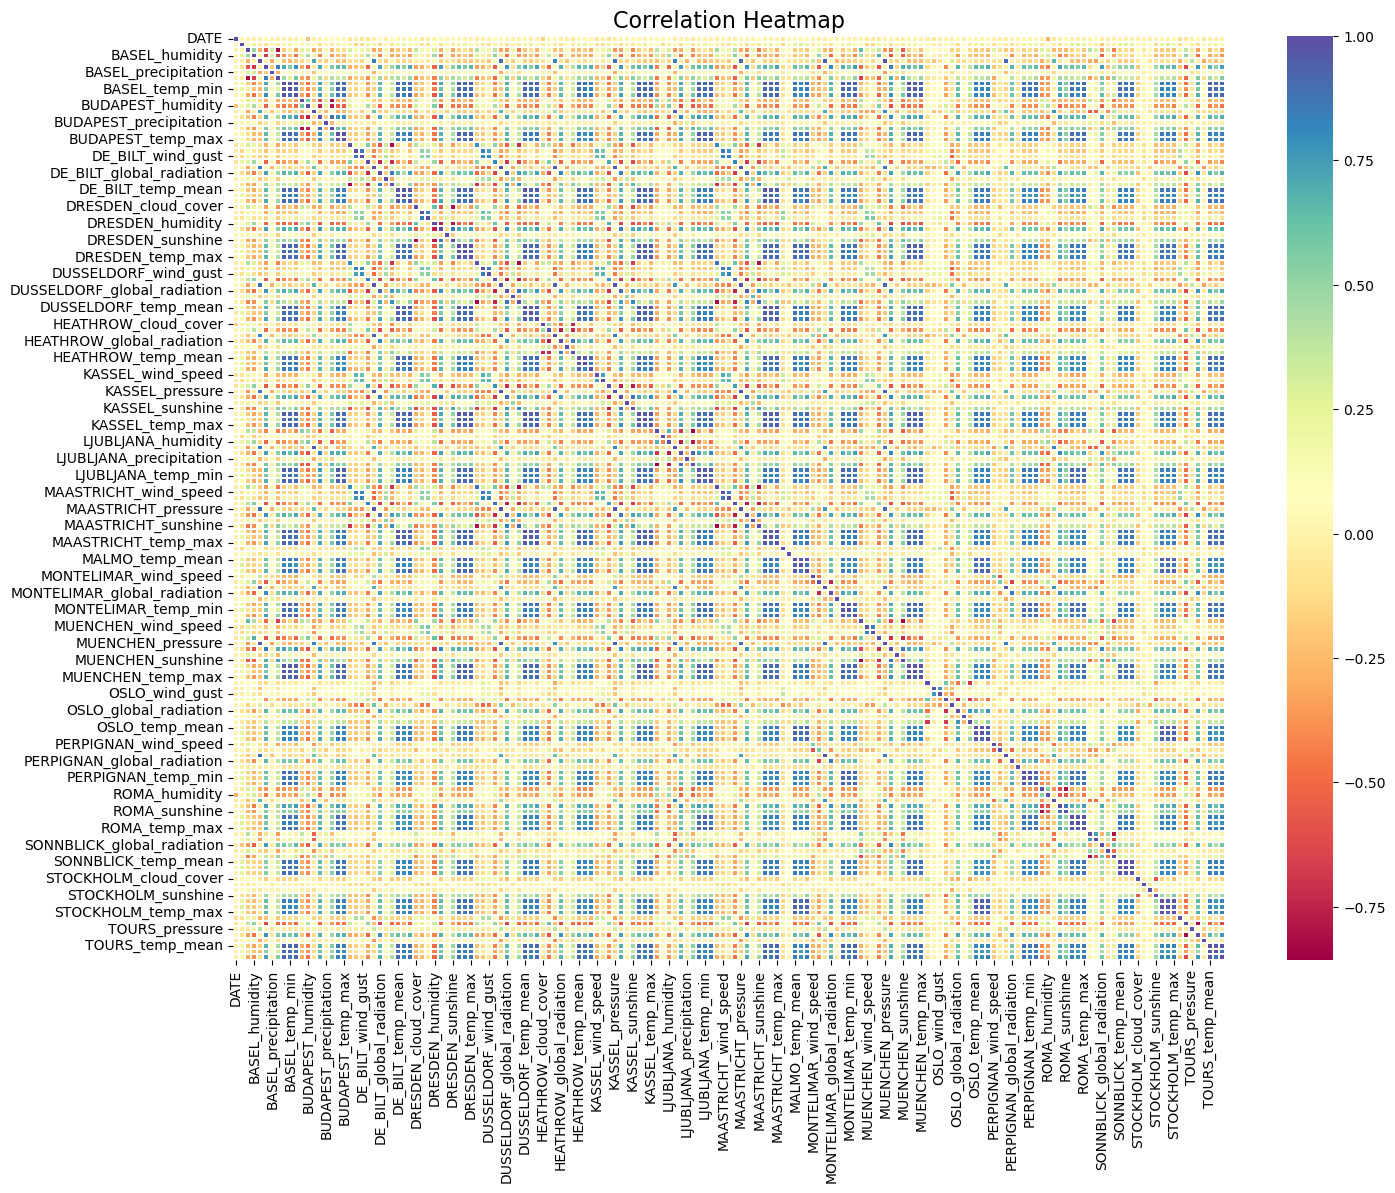

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    data.corr(),
    cmap="Spectral",     # very colorful
    annot=False,
    linewidths=0.2
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


## Identify Duplicate Rows

In [8]:
print("Duplicate rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicate rows: 0


## Feature Distribution (Graphs / Pie Charts)

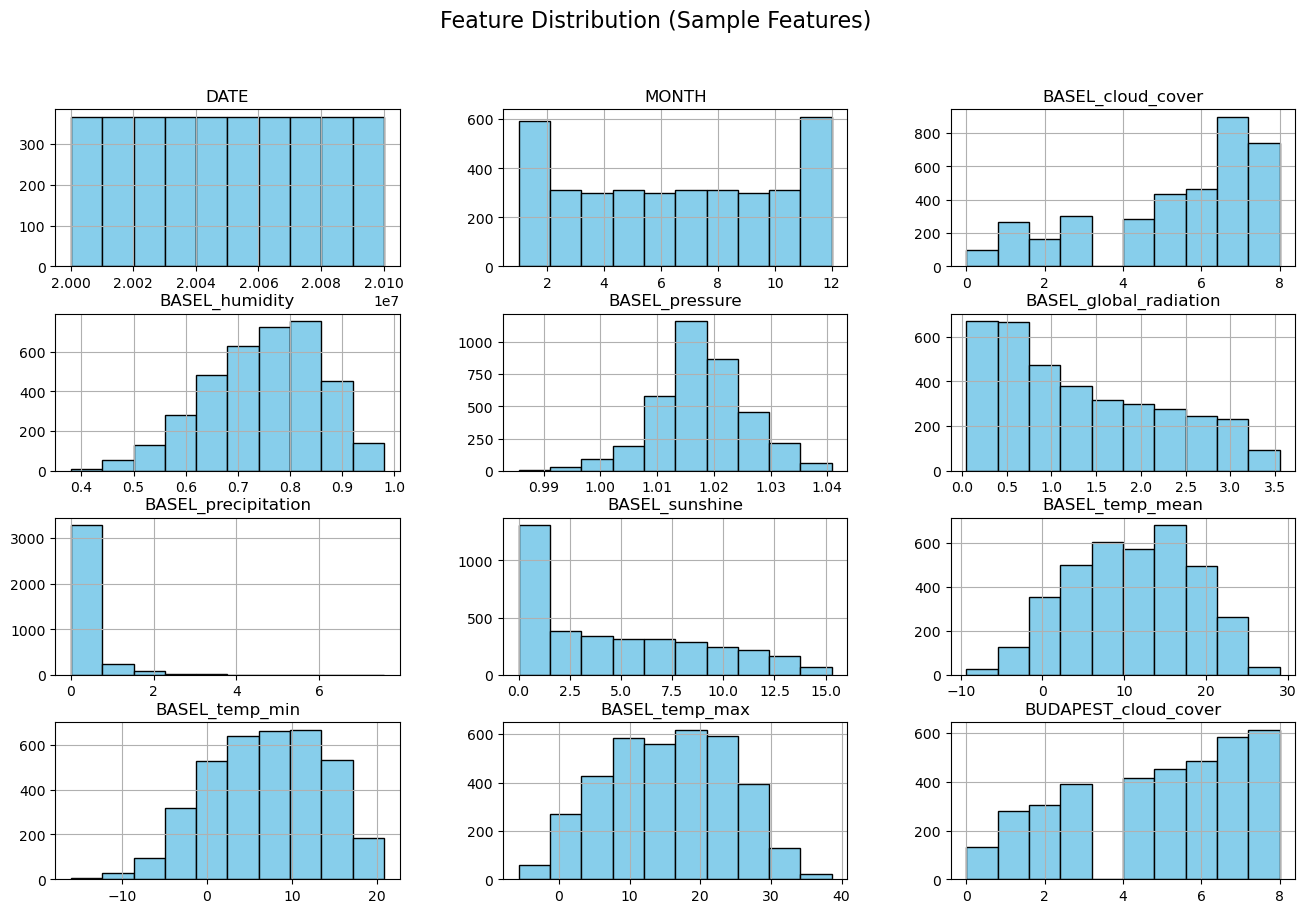

In [10]:
data.iloc[:, :12].hist(
    figsize=(16, 10),
    color='skyblue',
    edgecolor='black'
)
plt.suptitle("Feature Distribution (Sample Features)", fontsize=16)
plt.show()


## Correlation Heatmap

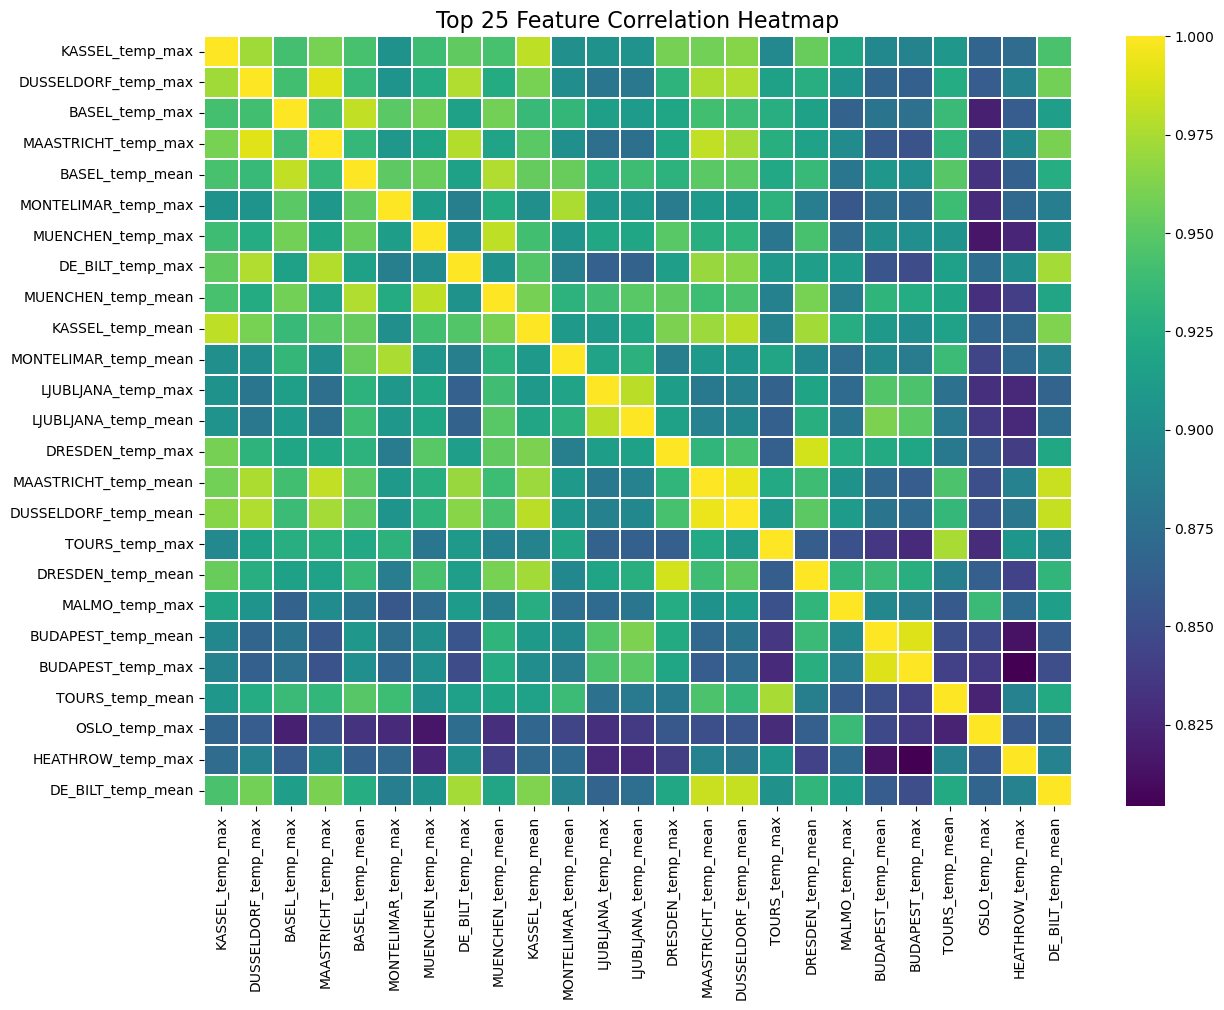

In [15]:
corr_matrix = data.corr()

top_features = corr_matrix.abs().mean().sort_values(ascending=False).head(25).index

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix.loc[top_features, top_features],
    cmap="viridis",
    annot=False,
    linewidths=0.3
)

plt.title("Top 25 Feature Correlation Heatmap", fontsize=16)
plt.show()


## Splitting Dataset

In [16]:
target_column = 'BASEL_precipitation'

X = data.drop(target_column, axis=1)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2923, 164)
Test shape: (731, 164)


## Model Training & Evaluation

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Binary target
data['Rain_Class'] = (data['BASEL_precipitation'] > 0).astype(int)

X = data.drop(['BASEL_precipitation', 'Rain_Class', 'DATE'], axis=1)
y = data['Rain_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling (IMPORTANT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

# Prediction
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8057455540355677


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Binary target
data['Rain_Class'] = (data['BASEL_precipitation'] > 0).astype(int)

# Drop non-numeric / target leakage columns
X = data.drop(['BASEL_precipitation', 'Rain_Class', 'DATE'], axis=1)
y = data['Rain_Class']

# Safety cleanup
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

# Prediction
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7578659370725034
[[306  85]
 [ 92 248]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       391
           1       0.74      0.73      0.74       340

    accuracy                           0.76       731
   macro avg       0.76      0.76      0.76       731
weighted avg       0.76      0.76      0.76       731



## Feature Importance

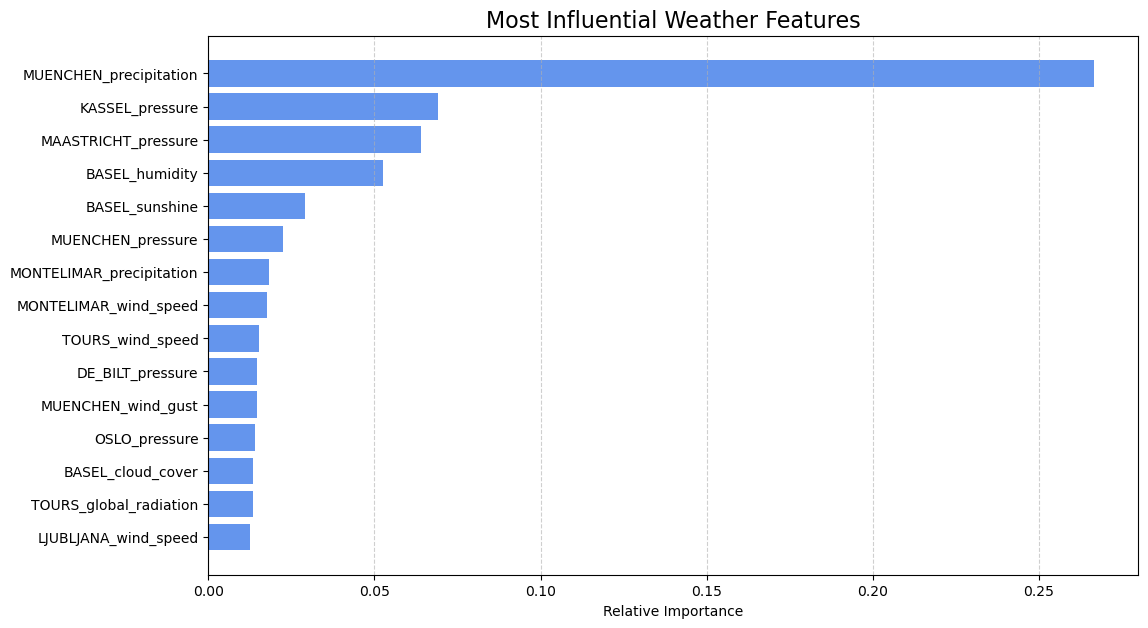

In [29]:
plt.figure(figsize=(12, 7))

plt.barh(
    top_features.index[::-1],
    top_features.values[::-1],
    color='cornflowerblue'
)

plt.title("Most Influential Weather Features", fontsize=16)
plt.xlabel("Relative Importance")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## Prediction 

Predicted Class (Logistic Regression): [0]


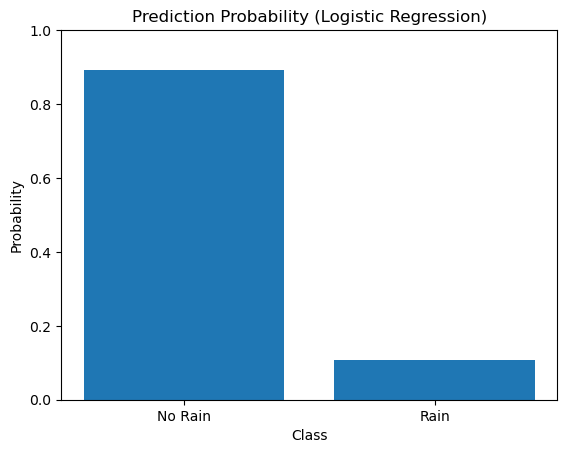

In [51]:
import matplotlib.pyplot as plt

# Take one sample from test set (keep 2D)
sample = X_test.iloc[[0]]

# Scale using the SAME scaler
sample_scaled = scaler.transform(sample)

# Predict class
prediction = lr.predict(sample_scaled)

# Predict probabilities
probabilities = lr.predict_proba(sample_scaled)[0]

print("Predicted Class (Logistic Regression):", prediction)

# Plot probability graph
plt.figure()
plt.bar(['No Rain', 'Rain'], probabilities)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Probability (Logistic Regression)')
plt.ylim(0, 1)
plt.show()


## Comparison of Models

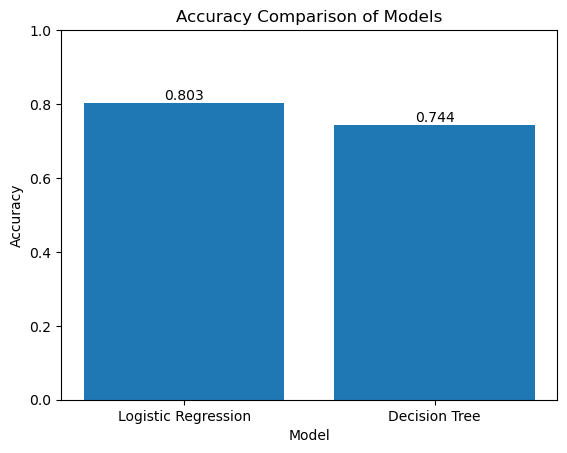

In [52]:
plt.figure()
bars = plt.bar(
    comparison['Model'],
    comparison['Accuracy']
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)
plt.show()


## Cross Variable Source Comparison

In [41]:
import pandas as pd

# Find the target column name automatically
target_col = None
for col in data.columns:
    if 'rain' in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("No column containing 'rain' was found in the dataset.")

print("Target column detected:", target_col)

# Convert target column to numeric if it contains Yes/No
if data[target_col].dtype == 'object':
    data[target_col] = data[target_col].map({'No': 0, 'Yes': 1})

# Select numeric columns only
data_numeric = data.select_dtypes(include='number').dropna()

# Print correlation
print("Correlation with Target:")
print(data_numeric.corr()[target_col].sort_values(ascending=False))


Target column detected: Rain_Class
Correlation with Target:
Rain_Class              1.000000
BASEL_cloud_cover       0.487320
BASEL_precipitation     0.467772
MUENCHEN_cloud_cover    0.344543
BASEL_humidity          0.339802
                          ...   
MAASTRICHT_pressure    -0.456884
MUENCHEN_pressure      -0.465297
DUSSELDORF_pressure    -0.472709
BASEL_sunshine         -0.474912
KASSEL_pressure        -0.492529
Name: Rain_Class, Length: 166, dtype: float64


## Training Time Comparison

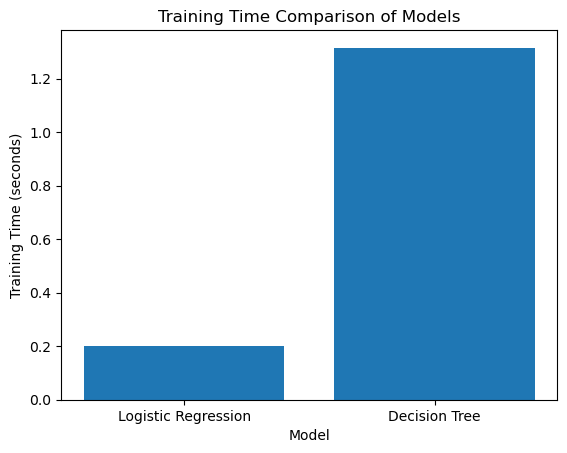

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    time_comparison['Model'],
    time_comparison['Training Time (seconds)']
)
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison of Models')
plt.show()


## Data Description

In [45]:
print(data.describe())

               DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.330380             0.234849   
std          0.007962                0.935348             0.536267   
min          0.985600                0.050000             0.000000   
25%       